In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.Luminosity.special_radii import get_photosphere
from src.Calculators.ray_cesare import ray_maker

In [2]:
m = 6
def select_fix(m):
    if m == 4:
        snapshots = [233] #, 254, 263, 277 , 293, 308, 322]
        days = [1]# , 1.2, 1.3, 1.4, 1.56, 1.7, 1.8] 
    if m == 6:
        snapshots = [844, 881, 925, 950] #[844, 881, 882, 898, 925, 950]
        days = [1, 1.1, 1.3, 1.4] #[1, 1.139, 1.143, 1.2, 1.3, 1.4] # t/t_fb
        const = 0.05
        beginning = 1200
    num_array = beginning * np.ones(len(snapshots))
    for i in range(1,len(num_array)):
            num_array[i] = int(1.5 * num_array[i-1])
    return snapshots, days, num_array

In [3]:
fixes, days, nums_array = select_fix(m)

In [4]:
fix = 844
num_array = 1200

In [5]:
rays_T, rays_den, rays, radii = ray_maker(fix, m, num_array)
_, _, photo = get_photosphere(rays_T, rays_den, radii)
photo_mean = np.mean(photo)

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [9]:
Rsol_to_cm = 6.957e10
idx = np.argmin(np.abs(photo_mean-radii))
mean_diff = (radii[idx+1]-radii[idx])/Rsol_to_cm
print(mean_diff)

2.88575797400168


In [10]:
spacing = np.zeros(len(rays_T))
for i in range(len(rays_T)):
    ph = photo[i]
    i_photo = np.argmin(np.abs(ph-radii))
    spacing[i] = (radii[i_photo+1]-radii[i_photo])/Rsol_to_cm

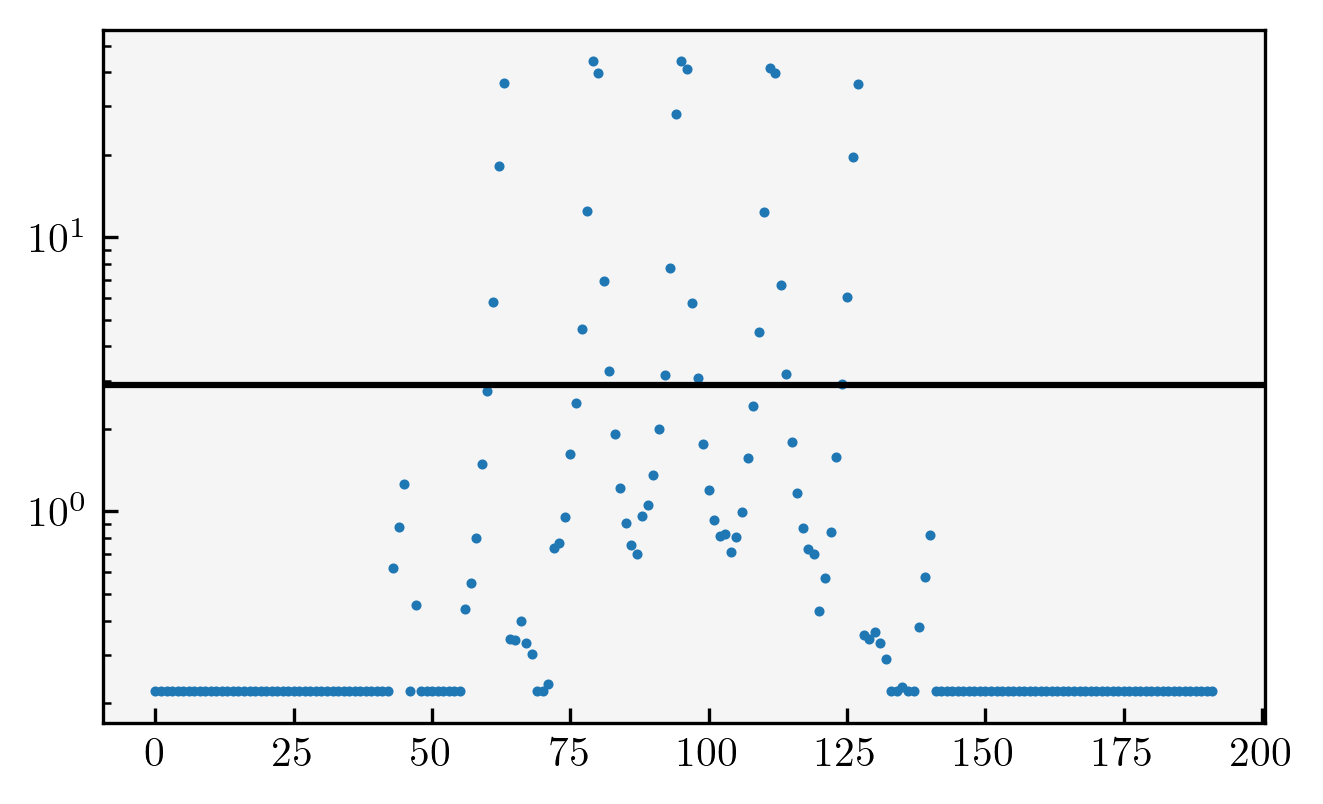

In [17]:
plt.scatter(np.arange(192), spacing, s = 2)
plt.axhline(mean_diff, c = 'k')
plt.yscale('log')

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

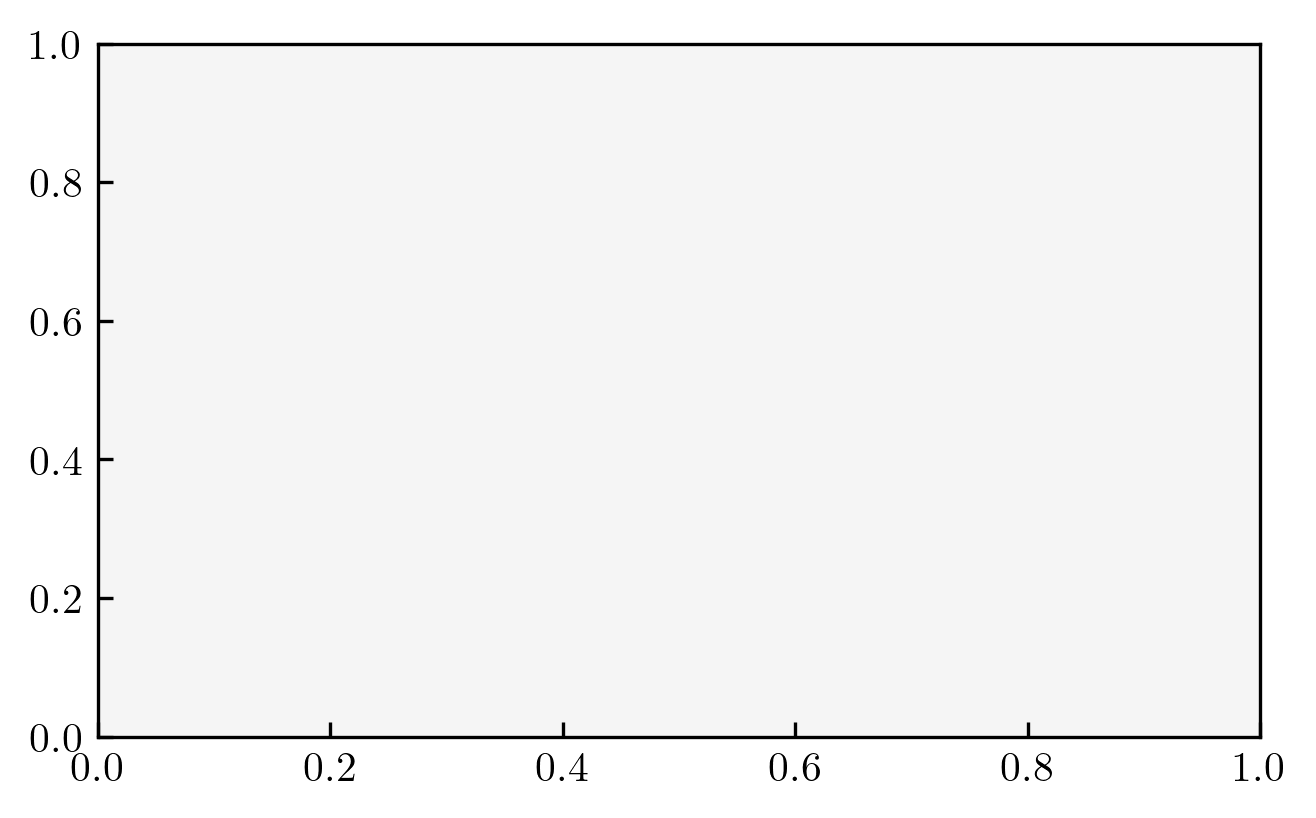

In [10]:
plt.plot(days,num_array, '-o')
print(num_array)